# <font color='Purple'>Machine Learning : (Titanic Dataset from Kaggle platform)</font>
    
</div>
<img src="https://cdn-s-www.leprogres.fr/images/27D4CF66-16A2-4C0C-A2DD-72BC6AF47D38/NW_raw/le-naufrage-du-titanic-reconstitue-pour-le-projet-quot-titanic-honour-and-glory-quot-dr-1562590772.jpg">



# <font color='orange'>Predict Survival On The Titanic</font> 

<div class="alert alert-block alert-info">   
<b>Steps:</b> 

1. Defining the problem 
2. Collecting the data
3. Data Exploration (EDA)
4. Data Visulaization
    1. how titanic sank?
    2. Understanding the shape of the data (Histograms, box plots, Bar chart etc.)
    
5. Data Cleaning (data preparation) 
    1. Identify and Handle Missing Values
    2. Remove duplicates
    3. Check for inconsistent or incorrect values
    4. Remove Outliers
    5. Standardize the Data
    6. Check for Data Integrity
    7. Transform the Data
    8. Export the Cleaned Data
    
6. Feature Engineering
7. Data Preprocessing for Model
8. Basic Model Building
9. Model Tuning
10. Model Evaluation

## <font color='Blue'>1. Defining the problem statement</font>  

<div class="alert alert-block alert-info">
<b>Requirements:</b> 
Using Titanic Dataset from Kaggle platform 
it is required to design different classifiers. For the training set, it is provided the outcome (also
known as the “ground truth”) for each passenger. Your model will be based on “features” like
passengers’ gender and class. You can also use feature engineering to create new features.
You will have to divide the data into three partitions: training, validation, and testing. You
need to design the following classifiers:
    
</div>

[Download Datasets](https://www.kaggle.com/competitions/titanic)


## <font color='black'>Import Library</font>  

In [1]:
from IPython.display import Image
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# import python lib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots
from utils import function as fn

## <font color='Blue'>2. Collecting the data</font>  

<div class="alert alert-block alert-info">
<b>Steps:</b>   
load train and test dataset using Pandas
</div>

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## <font color='Blue'>3. Exploratory data analysis</font>  
<div class="alert alert-block alert-info">
<b>Steps:</b>   
Printing first 5 rows of the train dataset.
</div>


In [3]:
# traninig Datasets
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# testing Datasets
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<div class="alert alert-block alert-info">


The data has been split into two groups:

training set (train.csv) test set (test.csv) The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

<b>Data Dictionary:</b> 

- survival Survival 0 = No, 1 = Yes

- pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

- sex Male or Female

- Age Age in years

- sibsp # of siblings / spouses aboard the Titanic

- parch # of parents / children aboard the Titanic

- ticket Ticket number

- fare Passenger fare

- cabin Cabin number

- embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

- Variable Notes pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister

- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...

- Parent = mother, father

- Child = daughter, son, stepdaughter, stepson

- Some children travelled only with a nanny, therefore parch=0 for them
    
</div>


In [5]:
# show train data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# show test data info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB



<div class="alert alert-block alert-warning">
<b>Observation:</b> 
We can see that there are 891 rows and 12 columns in our training dataset.
</div>

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

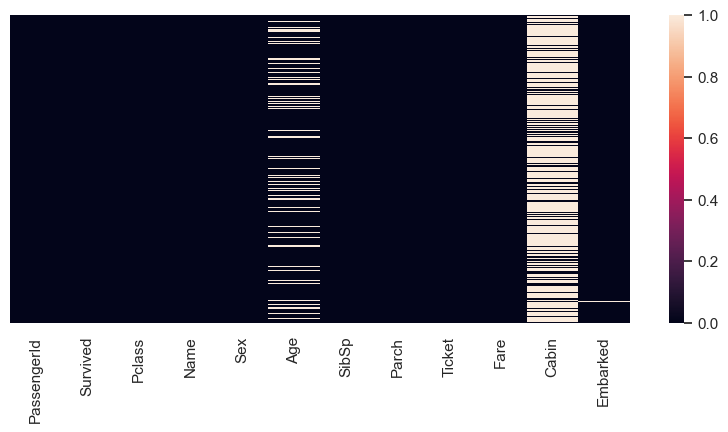

In [8]:
plt.figure(figsize=(10,4))
sns.heatmap(train.isnull(),yticklabels=False,cbar=True)

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

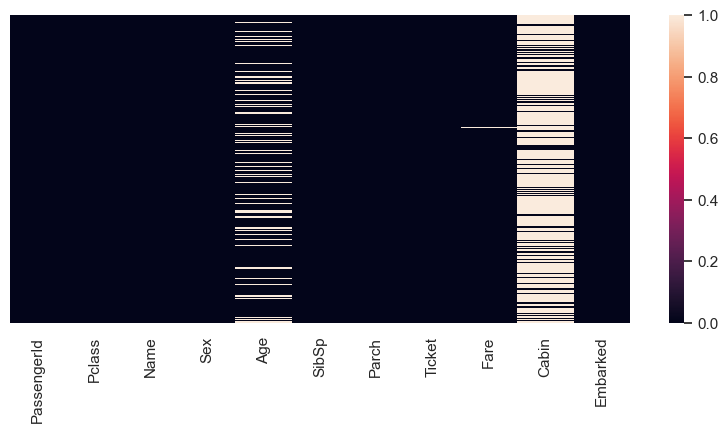

In [10]:
plt.figure(figsize=(10,4))
sns.heatmap(test.isnull(),yticklabels=False,cbar=True)

<div class="alert alert-block alert-warning">
<b>Observation:</b> 
    
- We can see that *Age* value is missing for many rows. 

- Out of 891 rows, the *Age* value is present only in 714 rows.

- Similarly, *Cabin* values are also missing in many rows. Only 204 out of 891 rows have *Cabin* values.

- <b>Finally:</b> 
There are 177 rows with missing *Age*, 687 rows with missing *Cabin* and 2 rows with missing *Embarked* information.
</div>



,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


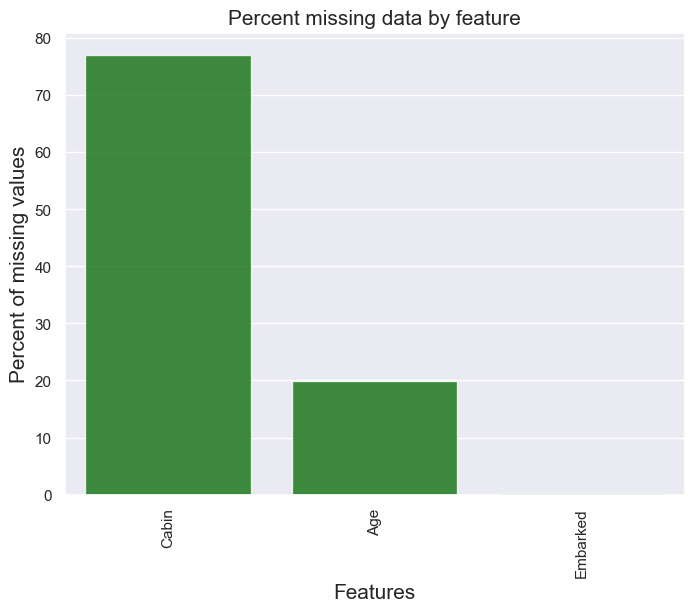

In [11]:
fn.missingdata(train)

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


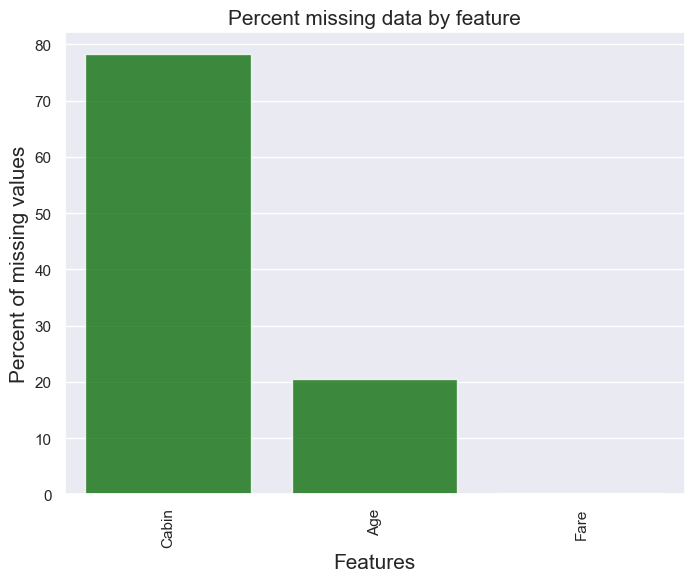

In [12]:
fn.missingdata(test)

In [13]:
# show train data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
# to better understand the numeric data, we want to use the .describe()
# method. This gives us an understanding of the central tendencies of the data 

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## <font color='Blue'>4 Data Visuzlization </font>  


###  <font color='black'> 4.1 how titanic sank?</font>

sank from the bow of the ship where third class rooms located  
conclusion, Pclass is key feature for classifier  
</div>
<img src="https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w">





In [15]:
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

**1) For numeric data**
 - Made histograms to understand distributions
 - Corrplot
 - Pivot table comparing survival rate across numeric variables

**2) For Categorical Data**
 
 - Made bar charts to understand balance of classes
 - Made pivot tables to understand relationship with survival

In [16]:
# look at numeric and categorical values separately 
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

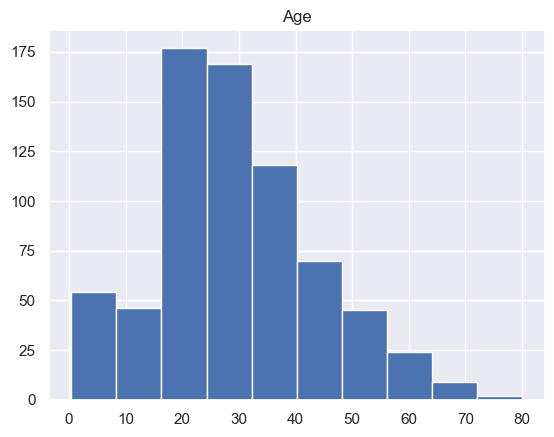

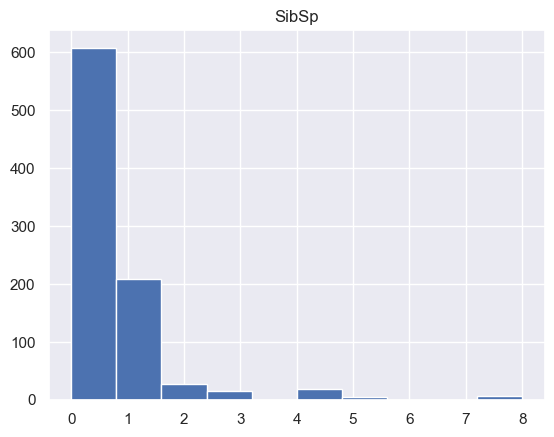

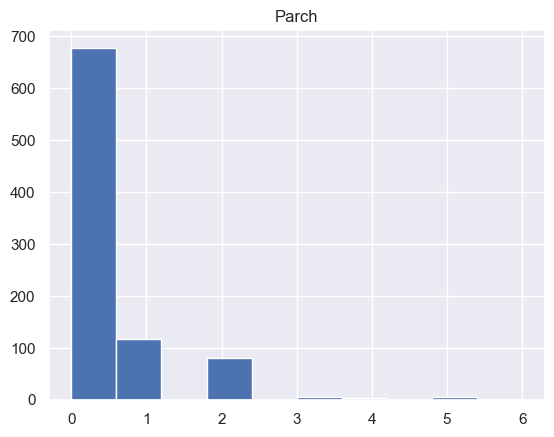

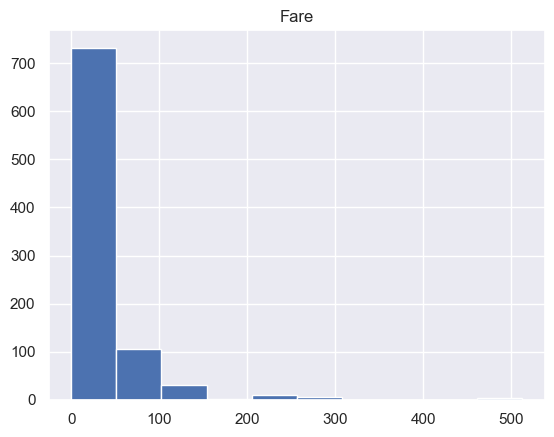

In [17]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

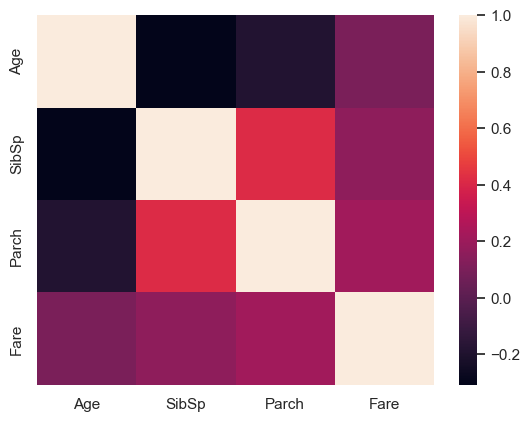

In [18]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [19]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [20]:
# Comparing survival and each of these categorical variables 
pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [21]:
pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [22]:
pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


## <font color='Blue'>5 Data Cleaning (data preparation) </font>  


In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-block alert-warning">
<b>Note:</b> 
Both the test and train Age features contains more the 15% of missing Data so we are fill with the median
</div>


In [24]:
train['Age'].fillna(train['Age'].median(), inplace = True)
test['Age'].fillna(test['Age'].median(), inplace = True)

In [25]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

In [26]:
test['Fare'].fillna(test['Fare'].median(), inplace = True)

In [27]:
drop_column = ['Cabin']
train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column,axis=1,inplace=True)

<div class="alert alert-block alert-warning">
<b>Note:</b> 
Cabin Featueres has more than 75% of missing data in both Test and train data so we are remove the Cabin
</div>

In [28]:
print('check the nan value in train data')
print(train.isnull().sum())
print('___'*30)
print('check the nan value in test data')
print(test.isnull().sum())

check the nan value in train data
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
__________________________________________________________________________________________
check the nan value in test data
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [29]:
## combine test and train as single to apply some function
all_data=[train,test]

In [30]:
# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [31]:
all_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [32]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')



In [33]:
## create bin for age features
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [34]:
## create bin for fare features
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [35]:
all_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr,Adult,Low_fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs,Adult,high_fare
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss,Adult,median_fare
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs,Adult,high_fare
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr,Adult,median_fare


In [36]:
### for our reference making a copy of both DataSet start working for copy of dataset
traindf=train
testdf=test

In [37]:
all_dat=[traindf,testdf]

In [38]:
for dataset in all_dat:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

In [39]:
drop_column = ['PassengerId']
traindf.drop(drop_column, axis=1, inplace = True)

In [40]:
traindf.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,0,3,male,1,0,S,2,Mr,Adult,Low_fare
1,1,1,female,1,0,C,2,Mrs,Adult,high_fare
2,1,3,female,0,0,S,1,Miss,Adult,median_fare
3,1,1,female,1,0,S,2,Mrs,Adult,high_fare
4,0,3,male,0,0,S,1,Mr,Adult,median_fare


In [41]:
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [42]:
testdf = pd.get_dummies(testdf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [43]:
testdf.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,892,3,0,0,1,False,True,False,False,True,...,False,True,False,False,True,False,True,False,False,False
1,893,3,1,0,2,True,False,False,False,False,...,False,False,True,False,False,True,True,False,False,False
2,894,2,0,0,1,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False
3,895,3,0,0,1,False,True,False,False,True,...,False,True,False,False,False,True,False,True,False,False
4,896,3,1,1,3,True,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False


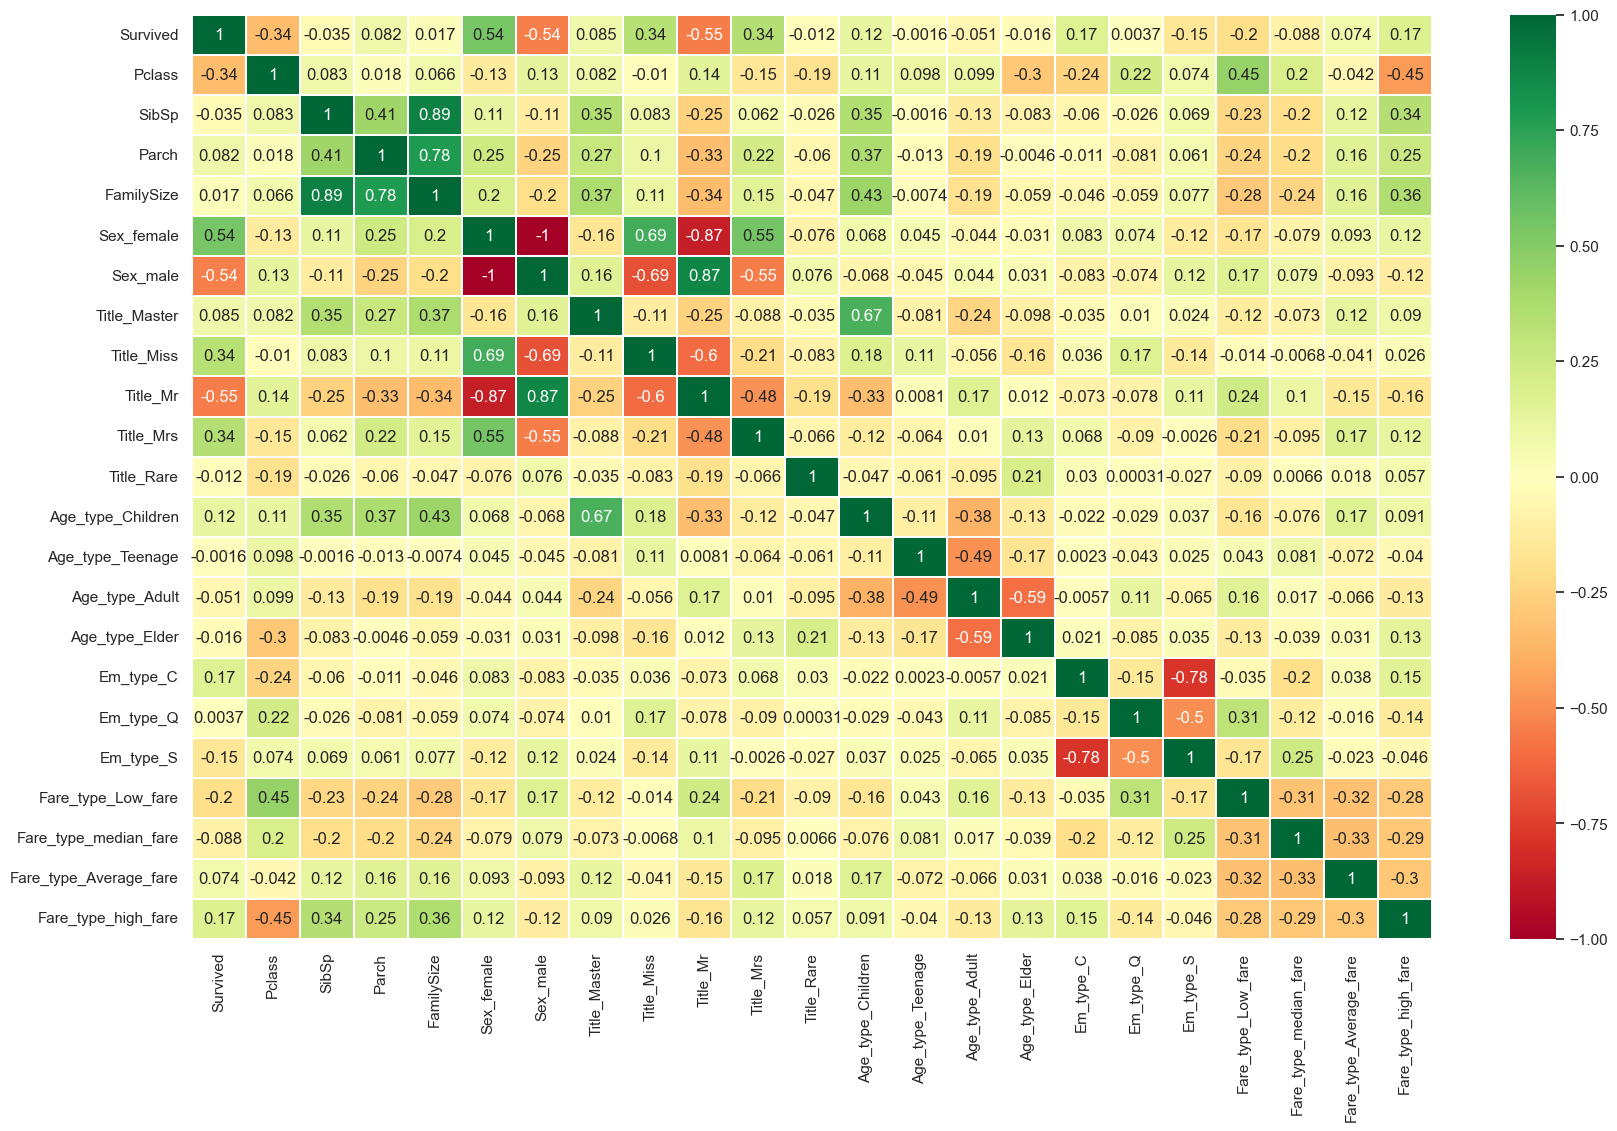

In [44]:
sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

# Import Librarys

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold

In [46]:


def roc_auc(model,all_features,Targeted_feature):
    
    # ROC Curve and AUC Score
    y_scores = cross_val_predict(model, all_features, Targeted_feature, cv=10)
    fpr, tpr, thresholds = roc_curve(Targeted_feature, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC/AUC Curve')
    plt.show()
    
    auc_score = roc_auc_score(Targeted_feature, y_scores)
    print(f'AUC Score: {auc_score}')
    
def prc(Targeted_feature,y_scores):
    # Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(Targeted_feature, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# cross Validation

In [47]:
from sklearn.model_selection import train_test_split #for split the data

all_features = traindf.drop("Survived",axis=1)
Targeted_feature = traindf["Survived"]

X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 22), (268, 22), (623,), (268,))

## <font color='Blue'>1. K Nearest Neighbors Classifier</font>   

Text(0, 0.5, 'Accuracy Score')

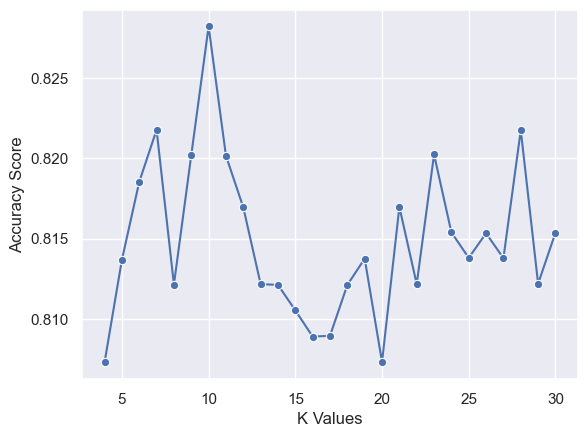

In [48]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [i for i in range (4,31)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=10)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [49]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

# Prediction
prediction_knn = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(prediction_knn, y_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearest Neighbors Classifier is', round(accuracy * 100, 2))

# Cross-validated score
kfold = KFold(n_splits=10, random_state=None)
result_knn = cross_val_score(model, all_features, Targeted_feature, cv=10, scoring='accuracy')
print('The cross-validated score for K Nearest Neighbors Classifier is:', round(result_knn.mean() * 100, 2))

# Cross-validated prediction
y_pred = cross_val_predict(model, all_features, Targeted_feature, cv=10)


--------------The Accuracy of the model----------------------------
The accuracy of the K Nearest Neighbors Classifier is 80.6
The cross-validated score for K Nearest Neighbors Classifier is: 81.71


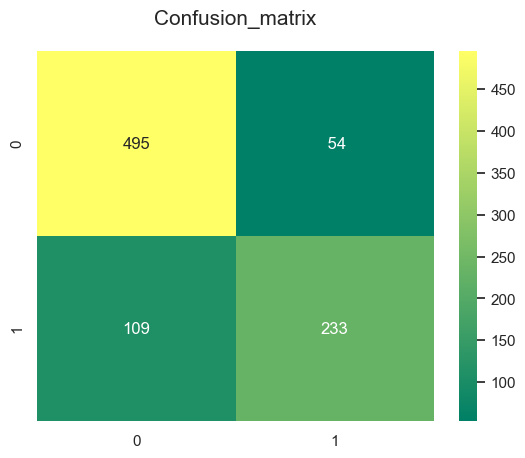

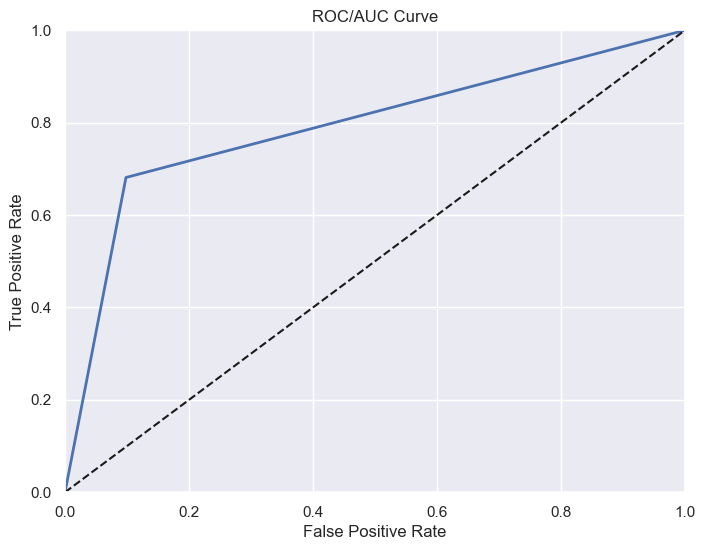

AUC Score: 0.7914629469849488


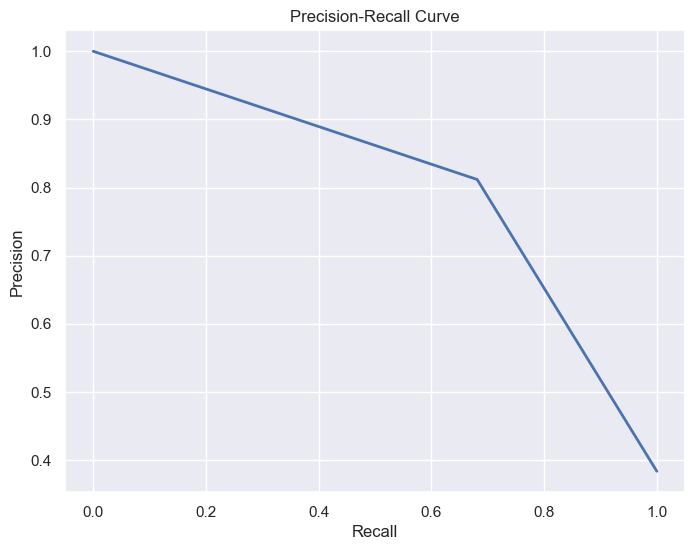

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       549
           1       0.81      0.68      0.74       342

    accuracy                           0.82       891
   macro avg       0.82      0.79      0.80       891
weighted avg       0.82      0.82      0.81       891



In [50]:

# Confusion Matrix
sns.heatmap(confusion_matrix(Targeted_feature, y_pred), annot=True, fmt='3.0f', cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

# ROC/AUC Curve Matrix
roc_auc(model,all_features,Targeted_feature)

#precision-recall
prc(Targeted_feature,y_pred)

print(classification_report(Targeted_feature, y_pred))

## <font color='Blue'>2. Support Vector Machines Classifier</font>   

# Hyperparameter Tuning 

In [51]:
from sklearn.model_selection import GridSearchCV 
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC


# defining parameter range 
param_grid = {'C': [0.1, 1.0, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001 , 'scale'], 
              'kernel': [  'linear', 'poly', 'rbf', 'sigmoid']}  

grid_svc = GridSearchCV(SVC(), param_grid, cv=10,refit = True, verbose =  3 ,scoring='accuracy',n_jobs=-1)
# fitting the model for grid search 
grid_svc.fit(X_train,y_train)

print('Best parameters from Grid Search on subset: {}'.format(grid_svc.best_params_))
print('Best score: {}'.format(grid_svc.best_score_))


Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Best parameters from Grid Search on subset: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best score: 0.833026113671275


In [52]:
# Fit the model
modelSVM = SVC(C=100, gamma= 0.01 ,kernel='rbf')
modelSVM.fit(X_train, y_train)

# Prediction
prediction_svm = modelSVM.predict(X_test)


#Testin usin Test Data (Accuracy)
accuracy = accuracy_score(prediction_svm, y_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Support Vector Machine Classifier is', round(accuracy * 100, 2))


# validation usin Train Data
# Cross-validated score
kfold = KFold(n_splits=10, random_state=None)
result_svm = cross_val_score(modelSVM, all_features, Targeted_feature, cv=10, scoring='accuracy')
print('The cross-validated score for Support Vector Machines Classifier is:', round(result_svm.mean() * 100, 2))

# Cross-validated prediction
y_predSVM = cross_val_predict(modelSVM, all_features, Targeted_feature, cv=10)



--------------The Accuracy of the model----------------------------
The accuracy of the Support Vector Machine Classifier is 83.21
The cross-validated score for Support Vector Machines Classifier is: 83.28


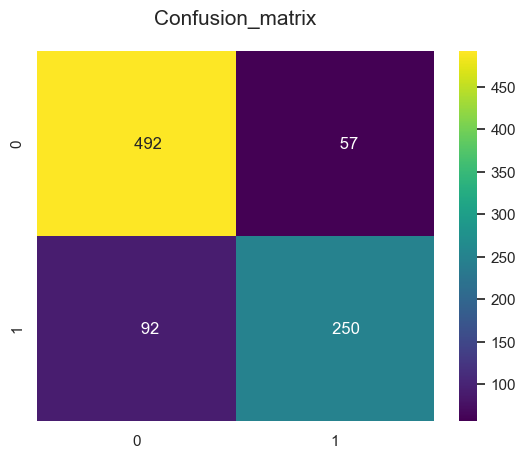

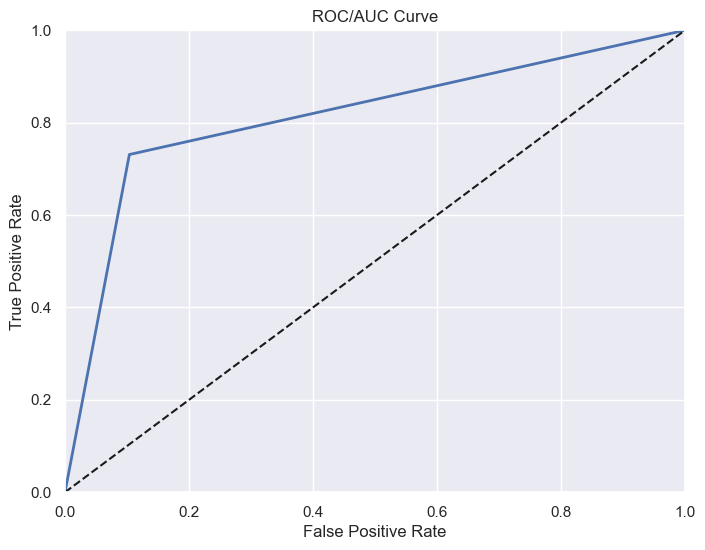

AUC Score: 0.8135845077173809


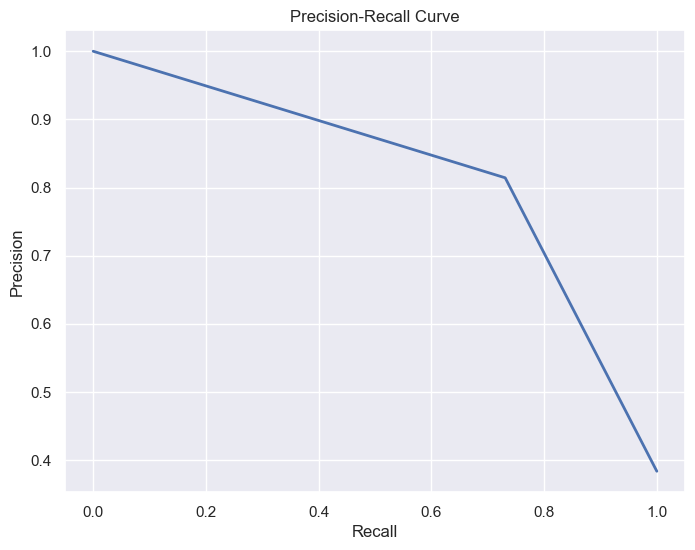

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       549
           1       0.81      0.73      0.77       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



In [53]:
# Confusion Matrix
sns.heatmap(confusion_matrix(Targeted_feature, y_predSVM), annot=True, fmt='8.0f', cmap='viridis')
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

# ROC/AUC Curve Matrix
roc_auc(modelSVM,all_features,Targeted_feature)
    
# precision_recall_curve
prc(Targeted_feature,y_predSVM)
  
print(classification_report(Targeted_feature, y_predSVM))

# Recall = TP/TP+FN
# precision = TP /TP +FP
# Accuracy = TP+TN / Total

## <font color='Blue'>3.GaussianNB</font>   

--------------The Accuracy of the model----------------------------
The accuracy of the Gaussian Naive Bayes Classifier is 79.48
The cross validated score for Gaussian Naive Bayes classifier is: 79.8


Text(0.5, 1.05, 'Confusion_matrix')

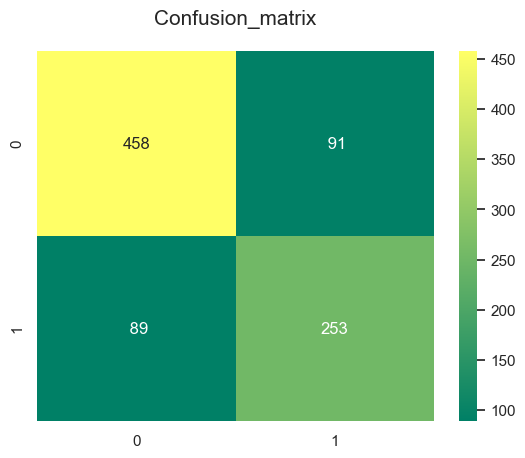

In [54]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train,y_train)
prediction_bayes = nb.predict(X_test)

print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_bayes,y_test)*100,2))

kfold = KFold(n_splits=10, random_state=None) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(nb,all_features,Targeted_feature,cv=10,scoring='accuracy')

print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))

y_prednb = cross_val_predict(nb,all_features,Targeted_feature,cv=10)

sns.heatmap(confusion_matrix(Targeted_feature,y_prednb),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## <font color='Blue'>Naive Bayes Hyperparameter Tuning</font>   

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Accuracy: 0.832089552238806


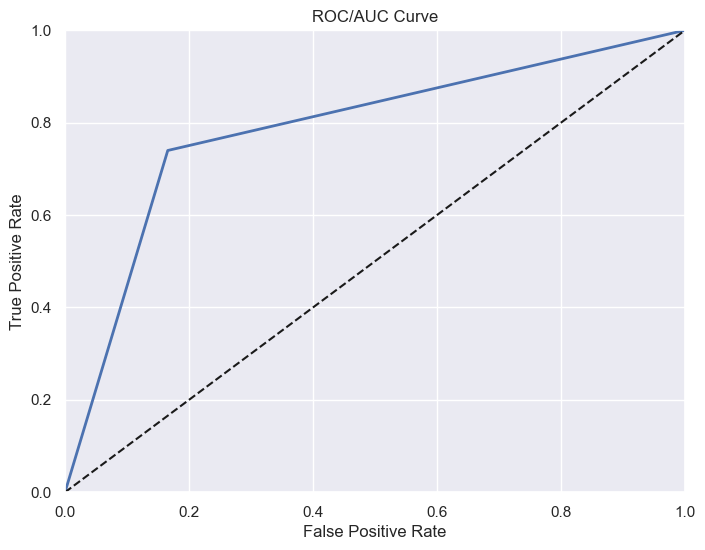

AUC Score: 0.7870050810085323


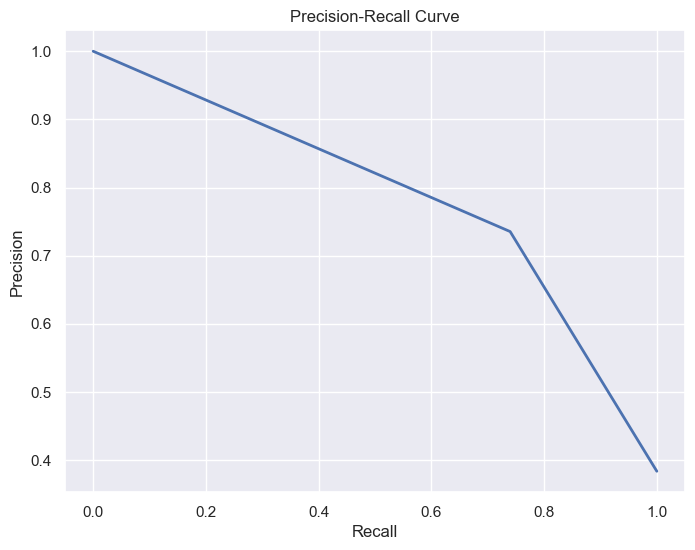

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       549
           1       0.74      0.74      0.74       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



In [55]:
# Gaussian Naive Bayes

param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

#making a grid of 10 folds, each with 100 cells

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid_nb, verbose=1,cv=10, n_jobs=-1)

grid_result = grid_search.fit(X_train, y_train)

prediction_bayes_2=grid_result.predict(X_test)

print("Accuracy:",accuracy_score(y_test, prediction_bayes_2))

# ROC/AUC Curve Matrix
roc_auc(nb,all_features,Targeted_feature)

# precision_recall_curve
prc(Targeted_feature,y_prednb)


print(classification_report(Targeted_feature, y_prednb))

# Recall = TP/TP+FN
# precision = TP /TP +FP
# Accuracy = TP+TN / Total

## <font color='Blue'>4.Decision Trees</font>   

In [56]:
#Random Values
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth=6, random_state=0 ,criterion='entropy' , min_samples_split=2)
model_dt.fit(X_train,y_train)

prediction_tree = model_dt.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Descision Tree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=None) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Descision Tree classifier is:',round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)

--------------The Accuracy of the model----------------------------
The accuracy of the Descision Tree Classifier is 79.1
The cross validated score for Descision Tree classifier is: 81.71


## <font color='Blue'>Hyperparameter Tuning</font>   

In [57]:

param_grid_dt ={
 "criterion" : ["gini","entropy"],
 "max_depth" : [1,2,3,4,5,6,7,None],
}

#making a grid of 10 folds, each with 100 cells
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, verbose=3,cv=10, refit = True, n_jobs=-1 , scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
prediction_DT=grid_result.predict(X_test)

y_pred_test = grid_search.predict(X_test)
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
print('Best parameters from Grid Search on subset: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))


Fitting 10 folds for each of 16 candidates, totalling 160 fits
Accuracy score for test data is: 0.832089552238806
Best parameters from Grid Search on subset: {'criterion': 'gini', 'max_depth': 3}
Best score: 0.8330005120327699


In [58]:

model_dt = DecisionTreeClassifier(max_depth=3, random_state=0 ,criterion='gini' , min_samples_split=2)
model_dt.fit(X_train,y_train)
prediction_tree = model_dt.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Descision Tree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))

kfold = KFold(n_splits=10, random_state=None) # k=10, split the data into 10 equal parts

result_gnb=cross_val_score(model_dt,all_features,Targeted_feature,cv=10,scoring='accuracy')

print('The cross validated score for Descision Tree classifier is:',round(result_gnb.mean()*100,2))

y_preddt = cross_val_predict(model_dt,all_features,Targeted_feature,cv=10)

--------------The Accuracy of the model----------------------------
The accuracy of the Descision Tree Classifier is 83.21
The cross validated score for Descision Tree classifier is: 82.49


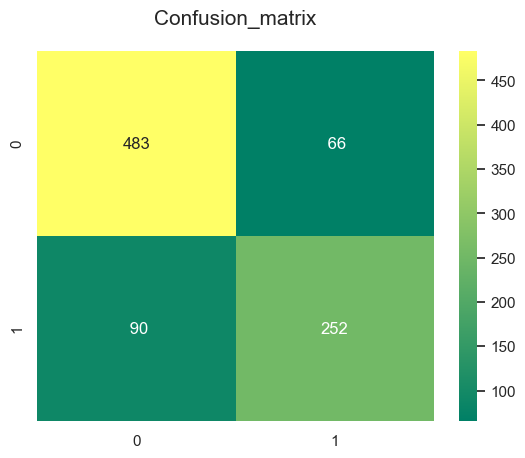

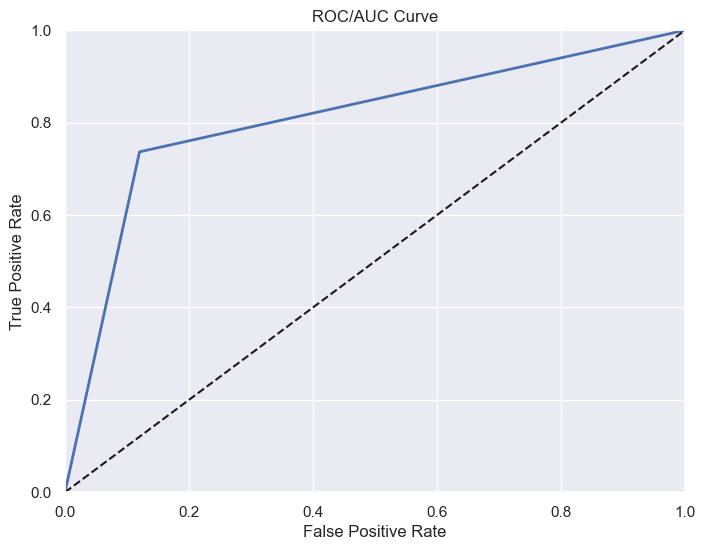

AUC Score: 0.8083117630140926


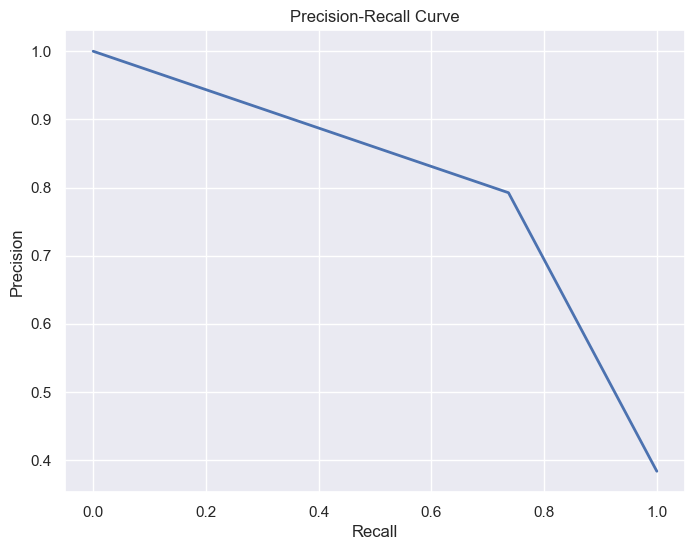

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       549
           1       0.79      0.74      0.76       342

    accuracy                           0.82       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



In [59]:
# Confusion_matrix

sns.heatmap(confusion_matrix(Targeted_feature,y_preddt),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

# ROC/AUC Curve Matrix
roc_auc(model_dt,all_features,Targeted_feature)
    

# precision_recall_curve
prc(Targeted_feature,y_preddt)


print(classification_report(Targeted_feature, y_preddt))

# Recall = TP/TP+FN
# precision = TP /TP +FP
# Accuracy = TP+TN / Total

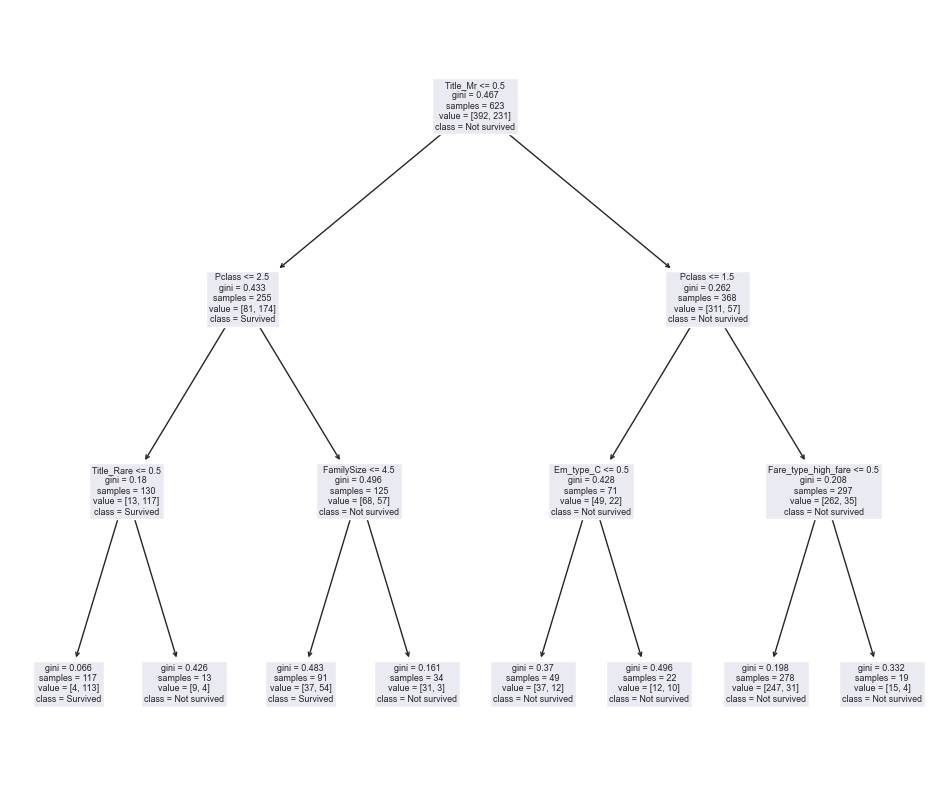

In [60]:
# Tree visualization
from sklearn import tree
fig = plt.figure(figsize=(12, 10))
tree.plot_tree(model_dt, feature_names=list(X_train.columns), class_names=['Not survived', 'Survived'])
plt.show()

In [61]:
feature_names= list(X_train.columns)

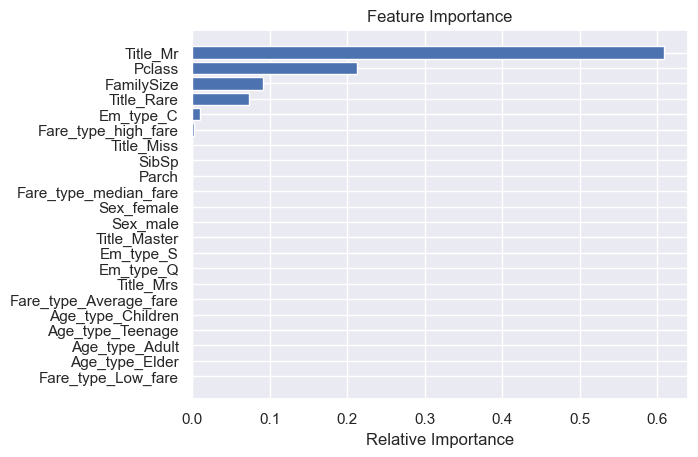

In [62]:
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [63]:
def get_gini_impurity(survived_count, total_count):
    survival_prob = survived_count/total_count
    not_survival_prob = (1 - survival_prob)
    random_observation_survived_prob = survival_prob
    random_observation_not_survived_prob = (1 - random_observation_survived_prob)
    mislabelling_survided_prob = not_survival_prob * random_observation_survived_prob
    mislabelling_not_survided_prob = survival_prob * random_observation_not_survived_prob
    gini_impurity = mislabelling_survided_prob + mislabelling_not_survided_prob
    return gini_impurity

def entropy(col):
    """
        This function calculates and returns the entropy for a particular column given as the only paramter.
    """
    
    # Get each unique class of the column and count for each class to calculate probabilites
    counts = np.unique(col, return_counts = True)
    
    N = float(col.shape[0])
    
    entropy = 0.0
    
    for idx in counts[1]:
        prob = idx/N
        entropy += -1 * prob * np.log2(prob)
    
    return entropy

## <font color='Blue'>5.Multilayer Perceptron</font>   

In [64]:
# Import MLPClassifer
from sklearn.neural_network import MLPClassifier
 # Create model object
mlp = MLPClassifier(hidden_layer_sizes=(6,5),random_state=5,verbose=True,learning_rate_init=0.01)
# Fit data onto the model
mlp.fit(X_train,y_train)   
 #Make the predictions
mlp_pred=mlp.predict(X_test)
 #Test accuracy
print("Accuracy:",accuracy_score(y_test, mlp_pred))
print("Number of iterations",mlp.n_iter_)

Iteration 1, loss = 0.64875413
Iteration 2, loss = 0.60971568
Iteration 3, loss = 0.58115504
Iteration 4, loss = 0.55016403
Iteration 5, loss = 0.52450807
Iteration 6, loss = 0.50631654
Iteration 7, loss = 0.49771912
Iteration 8, loss = 0.48949393
Iteration 9, loss = 0.47949960
Iteration 10, loss = 0.47417389
Iteration 11, loss = 0.46695752
Iteration 12, loss = 0.45602887
Iteration 13, loss = 0.44690728
Iteration 14, loss = 0.44366812
Iteration 15, loss = 0.43965742
Iteration 16, loss = 0.43329549
Iteration 17, loss = 0.43064042
Iteration 18, loss = 0.42799206
Iteration 19, loss = 0.43171096
Iteration 20, loss = 0.42143106
Iteration 21, loss = 0.42585516
Iteration 22, loss = 0.42403317
Iteration 23, loss = 0.42107110
Iteration 24, loss = 0.41558921
Iteration 25, loss = 0.41385240
Iteration 26, loss = 0.41379895
Iteration 27, loss = 0.41421889
Iteration 28, loss = 0.41862122
Iteration 29, loss = 0.41188232
Iteration 30, loss = 0.41459726
Iteration 31, loss = 0.40812193
Iteration 32, los

## <font color='Blue'>Hyperparameter Tuning</font>   


In [65]:
#Latest Update
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Create an MLP classifier
mlp2 = MLPClassifier()

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(6,5)],
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'max_iter': [100, 200, 300],
}

# Create a grid search object
grid_search = GridSearchCV(mlp2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)

# Get the best model

# Evaluate the best model on the test set

y_pred_test = grid_search.predict(X_test)
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
print('Best parameters from Grid Search on subset: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))


Best Parameters: {'hidden_layer_sizes': (6, 5), 'learning_rate_init': 0.001, 'max_iter': 200}
Accuracy score for test data is: 0.8059701492537313
Best parameters from Grid Search on subset: {'hidden_layer_sizes': (6, 5), 'learning_rate_init': 0.001, 'max_iter': 200}
Best score: 0.8250451612903227


In [66]:
mlp2 = MLPClassifier(hidden_layer_sizes=(6,5),random_state=5,verbose=True,learning_rate_init=0.001,max_iter=300)

mlp2.fit(X_train,y_train)
prediction_mlp = mlp2.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Multi-Layer Perceptron Classifier is',round(accuracy_score(prediction_mlp,y_test)*100,2))

kfold = KFold(n_splits=10, random_state=None) # k=10, split the data into 10 equal parts

result_gnb=cross_val_score(mlp2,all_features,Targeted_feature,cv=10,scoring='accuracy')

print('The cross validated score for Multi-Layer Perceptron classifier is:',round(result_gnb.mean()*100,2))

y_predmlp = cross_val_predict(model_dt,all_features,Targeted_feature,cv=10)

Iteration 1, loss = 0.65913216
Iteration 2, loss = 0.65473518
Iteration 3, loss = 0.65086639
Iteration 4, loss = 0.64685439
Iteration 5, loss = 0.64268558
Iteration 6, loss = 0.63831014
Iteration 7, loss = 0.63438907
Iteration 8, loss = 0.63013834
Iteration 9, loss = 0.62627459
Iteration 10, loss = 0.62268672
Iteration 11, loss = 0.61939212
Iteration 12, loss = 0.61596966
Iteration 13, loss = 0.61261213
Iteration 14, loss = 0.60925997
Iteration 15, loss = 0.60562486
Iteration 16, loss = 0.60171281
Iteration 17, loss = 0.59796610
Iteration 18, loss = 0.59420261
Iteration 19, loss = 0.59063582
Iteration 20, loss = 0.58663609
Iteration 21, loss = 0.58232031
Iteration 22, loss = 0.57842854
Iteration 23, loss = 0.57400041
Iteration 24, loss = 0.57004703
Iteration 25, loss = 0.56593140
Iteration 26, loss = 0.56200847
Iteration 27, loss = 0.55813409
Iteration 28, loss = 0.55430341
Iteration 29, loss = 0.55052141
Iteration 30, loss = 0.54669816
Iteration 31, loss = 0.54287030
Iteration 32, los

Iteration 41, loss = 0.54953877
Iteration 42, loss = 0.54753981
Iteration 43, loss = 0.54647808
Iteration 44, loss = 0.54568116
Iteration 45, loss = 0.54455719
Iteration 46, loss = 0.54367262
Iteration 47, loss = 0.54290520
Iteration 48, loss = 0.54224742
Iteration 49, loss = 0.54117857
Iteration 50, loss = 0.53971733
Iteration 51, loss = 0.53806329
Iteration 52, loss = 0.53661397
Iteration 53, loss = 0.53504224
Iteration 54, loss = 0.53363775
Iteration 55, loss = 0.53246358
Iteration 56, loss = 0.53195357
Iteration 57, loss = 0.53192448
Iteration 58, loss = 0.53140295
Iteration 59, loss = 0.53028566
Iteration 60, loss = 0.52903309
Iteration 61, loss = 0.52820820
Iteration 62, loss = 0.52752499
Iteration 63, loss = 0.52672643
Iteration 64, loss = 0.52566243
Iteration 65, loss = 0.52451693
Iteration 66, loss = 0.52310206
Iteration 67, loss = 0.52160289
Iteration 68, loss = 0.52043432
Iteration 69, loss = 0.51931690
Iteration 70, loss = 0.51814486
Iteration 71, loss = 0.51758165
Iteratio

Iteration 141, loss = 0.44703473
Iteration 142, loss = 0.44693770
Iteration 143, loss = 0.44709064
Iteration 144, loss = 0.44696483
Iteration 145, loss = 0.44697939
Iteration 146, loss = 0.44676626
Iteration 147, loss = 0.44620154
Iteration 148, loss = 0.44601239
Iteration 149, loss = 0.44558843
Iteration 150, loss = 0.44530540
Iteration 151, loss = 0.44497131
Iteration 152, loss = 0.44458323
Iteration 153, loss = 0.44412642
Iteration 154, loss = 0.44360282
Iteration 155, loss = 0.44308655
Iteration 156, loss = 0.44284325
Iteration 157, loss = 0.44244595
Iteration 158, loss = 0.44261798
Iteration 159, loss = 0.44251331
Iteration 160, loss = 0.44195079
Iteration 161, loss = 0.44141723
Iteration 162, loss = 0.44160553
Iteration 163, loss = 0.44157179
Iteration 164, loss = 0.44105939
Iteration 165, loss = 0.44025545
Iteration 166, loss = 0.43979619
Iteration 167, loss = 0.43950200
Iteration 168, loss = 0.43956758
Iteration 169, loss = 0.43956582
Iteration 170, loss = 0.43971946
Iteration 

Iteration 155, loss = 0.43438227
Iteration 156, loss = 0.43406497
Iteration 157, loss = 0.43373496
Iteration 158, loss = 0.43385393
Iteration 159, loss = 0.43365106
Iteration 160, loss = 0.43324920
Iteration 161, loss = 0.43235451
Iteration 162, loss = 0.43268964
Iteration 163, loss = 0.43273546
Iteration 164, loss = 0.43225771
Iteration 165, loss = 0.43137848
Iteration 166, loss = 0.43075803
Iteration 167, loss = 0.43029602
Iteration 168, loss = 0.42992468
Iteration 169, loss = 0.42963509
Iteration 170, loss = 0.42949965
Iteration 171, loss = 0.42909218
Iteration 172, loss = 0.42872202
Iteration 173, loss = 0.42844883
Iteration 174, loss = 0.42817712
Iteration 175, loss = 0.42799849
Iteration 176, loss = 0.42784578
Iteration 177, loss = 0.42736244
Iteration 178, loss = 0.42708405
Iteration 179, loss = 0.42729552
Iteration 180, loss = 0.42714640
Iteration 181, loss = 0.42623108
Iteration 182, loss = 0.42585021
Iteration 183, loss = 0.42569015
Iteration 184, loss = 0.42604515
Iteration 

Iteration 165, loss = 0.44838318
Iteration 166, loss = 0.44791556
Iteration 167, loss = 0.44751602
Iteration 168, loss = 0.44717957
Iteration 169, loss = 0.44687144
Iteration 170, loss = 0.44667991
Iteration 171, loss = 0.44629058
Iteration 172, loss = 0.44617939
Iteration 173, loss = 0.44567167
Iteration 174, loss = 0.44511302
Iteration 175, loss = 0.44508955
Iteration 176, loss = 0.44495414
Iteration 177, loss = 0.44468963
Iteration 178, loss = 0.44445434
Iteration 179, loss = 0.44428310
Iteration 180, loss = 0.44413138
Iteration 181, loss = 0.44366611
Iteration 182, loss = 0.44382285
Iteration 183, loss = 0.44407852
Iteration 184, loss = 0.44381855
Iteration 185, loss = 0.44340896
Iteration 186, loss = 0.44305836
Iteration 187, loss = 0.44275065
Iteration 188, loss = 0.44239373
Iteration 189, loss = 0.44211192
Iteration 190, loss = 0.44179988
Iteration 191, loss = 0.44135762
Iteration 192, loss = 0.44111484
Iteration 193, loss = 0.44089169
Iteration 194, loss = 0.44061596
Iteration 

Iteration 180, loss = 0.44152418
Iteration 181, loss = 0.44095815
Iteration 182, loss = 0.44067281
Iteration 183, loss = 0.44036875
Iteration 184, loss = 0.44012186
Iteration 185, loss = 0.44009782
Iteration 186, loss = 0.43990396
Iteration 187, loss = 0.43962930
Iteration 188, loss = 0.43928843
Iteration 189, loss = 0.43905471
Iteration 190, loss = 0.43879339
Iteration 191, loss = 0.43859998
Iteration 192, loss = 0.43843212
Iteration 193, loss = 0.43810175
Iteration 194, loss = 0.43774760
Iteration 195, loss = 0.43755467
Iteration 196, loss = 0.43734909
Iteration 197, loss = 0.43724899
Iteration 198, loss = 0.43728540
Iteration 199, loss = 0.43699134
Iteration 200, loss = 0.43683150
Iteration 201, loss = 0.43676428
Iteration 202, loss = 0.43678738
Iteration 203, loss = 0.43611437
Iteration 204, loss = 0.43602327
Iteration 205, loss = 0.43584579
Iteration 206, loss = 0.43563574
Iteration 207, loss = 0.43555777
Iteration 208, loss = 0.43560695
Iteration 209, loss = 0.43551809
Iteration 

Iteration 187, loss = 0.43730979
Iteration 188, loss = 0.43688950
Iteration 189, loss = 0.43661134
Iteration 190, loss = 0.43632779
Iteration 191, loss = 0.43607865
Iteration 192, loss = 0.43573458
Iteration 193, loss = 0.43540419
Iteration 194, loss = 0.43511964
Iteration 195, loss = 0.43499001
Iteration 196, loss = 0.43455480
Iteration 197, loss = 0.43432287
Iteration 198, loss = 0.43402435
Iteration 199, loss = 0.43357948
Iteration 200, loss = 0.43342770
Iteration 201, loss = 0.43320819
Iteration 202, loss = 0.43328690
Iteration 203, loss = 0.43278678
Iteration 204, loss = 0.43309177
Iteration 205, loss = 0.43323744
Iteration 206, loss = 0.43298170
Iteration 207, loss = 0.43284361
Iteration 208, loss = 0.43293513
Iteration 209, loss = 0.43272975
Iteration 210, loss = 0.43262644
Iteration 211, loss = 0.43246956
Iteration 212, loss = 0.43190561
Iteration 213, loss = 0.43098264
Iteration 214, loss = 0.43028449
Iteration 215, loss = 0.43006456
Iteration 216, loss = 0.42984639
Iteration 

Iteration 172, loss = 0.44197177
Iteration 173, loss = 0.44161416
Iteration 174, loss = 0.44136246
Iteration 175, loss = 0.44108158
Iteration 176, loss = 0.44076771
Iteration 177, loss = 0.44173128
Iteration 178, loss = 0.44193907
Iteration 179, loss = 0.44220282
Iteration 180, loss = 0.44152309
Iteration 181, loss = 0.44042242
Iteration 182, loss = 0.43983375
Iteration 183, loss = 0.43932290
Iteration 184, loss = 0.43911308
Iteration 185, loss = 0.43964415
Iteration 186, loss = 0.43978287
Iteration 187, loss = 0.43923493
Iteration 188, loss = 0.43835868
Iteration 189, loss = 0.43733929
Iteration 190, loss = 0.43668842
Iteration 191, loss = 0.43622108
Iteration 192, loss = 0.43579016
Iteration 193, loss = 0.43520676
Iteration 194, loss = 0.43475618
Iteration 195, loss = 0.43476205
Iteration 196, loss = 0.43445921
Iteration 197, loss = 0.43424062
Iteration 198, loss = 0.43389905
Iteration 199, loss = 0.43344486
Iteration 200, loss = 0.43331989
Iteration 201, loss = 0.43305143
Iteration 

Iteration 210, loss = 0.43130666
Iteration 211, loss = 0.43103761
Iteration 212, loss = 0.42983707
Iteration 213, loss = 0.42961281
Iteration 214, loss = 0.42934524
Iteration 215, loss = 0.42914604
Iteration 216, loss = 0.42902859
Iteration 217, loss = 0.42942471
Iteration 218, loss = 0.42991646
Iteration 219, loss = 0.43025136
Iteration 220, loss = 0.42904942
Iteration 221, loss = 0.42820109
Iteration 222, loss = 0.42769794
Iteration 223, loss = 0.42746186
Iteration 224, loss = 0.42728004
Iteration 225, loss = 0.42696975
Iteration 226, loss = 0.42698222
Iteration 227, loss = 0.42668105
Iteration 228, loss = 0.42660109
Iteration 229, loss = 0.42650503
Iteration 230, loss = 0.42629992
Iteration 231, loss = 0.42625248
Iteration 232, loss = 0.42600440
Iteration 233, loss = 0.42584314
Iteration 234, loss = 0.42571774
Iteration 235, loss = 0.42565988
Iteration 236, loss = 0.42539799
Iteration 237, loss = 0.42533863
Iteration 238, loss = 0.42517827
Iteration 239, loss = 0.42496223
Iteration 

Iteration 223, loss = 0.43605986
Iteration 224, loss = 0.43580604
Iteration 225, loss = 0.43571054
Iteration 226, loss = 0.43545758
Iteration 227, loss = 0.43504439
Iteration 228, loss = 0.43498512
Iteration 229, loss = 0.43501226
Iteration 230, loss = 0.43479635
Iteration 231, loss = 0.43453311
Iteration 232, loss = 0.43419436
Iteration 233, loss = 0.43401466
Iteration 234, loss = 0.43387352
Iteration 235, loss = 0.43363369
Iteration 236, loss = 0.43340406
Iteration 237, loss = 0.43336794
Iteration 238, loss = 0.43330516
Iteration 239, loss = 0.43317865
Iteration 240, loss = 0.43317125
Iteration 241, loss = 0.43318013
Iteration 242, loss = 0.43309289
Iteration 243, loss = 0.43364795
Iteration 244, loss = 0.43359356
Iteration 245, loss = 0.43309391
Iteration 246, loss = 0.43253551
Iteration 247, loss = 0.43223284
Iteration 248, loss = 0.43206839
Iteration 249, loss = 0.43234872
Iteration 250, loss = 0.43239333
Iteration 251, loss = 0.43237820
Iteration 252, loss = 0.43236229
Iteration 

Iteration 239, loss = 0.43532979
Iteration 240, loss = 0.43536369
Iteration 241, loss = 0.43559280
Iteration 242, loss = 0.43554913
Iteration 243, loss = 0.43522792
Iteration 244, loss = 0.43500858
Iteration 245, loss = 0.43483907
Iteration 246, loss = 0.43469961
Iteration 247, loss = 0.43486221
Iteration 248, loss = 0.43480089
Iteration 249, loss = 0.43507088
Iteration 250, loss = 0.43535336
Iteration 251, loss = 0.43539466
Iteration 252, loss = 0.43537271
Iteration 253, loss = 0.43557340
Iteration 254, loss = 0.43560161
Iteration 255, loss = 0.43509511
Iteration 256, loss = 0.43475433
Iteration 257, loss = 0.43417688
Iteration 258, loss = 0.43388234
Iteration 259, loss = 0.43379075
Iteration 260, loss = 0.43379539
Iteration 261, loss = 0.43395817
Iteration 262, loss = 0.43430116
Iteration 263, loss = 0.43391707
Iteration 264, loss = 0.43376747
Iteration 265, loss = 0.43293971
Iteration 266, loss = 0.43255550
Iteration 267, loss = 0.43233028
Iteration 268, loss = 0.43213179
Iteration 

Iteration 1, loss = 0.66398817
Iteration 2, loss = 0.65893890
Iteration 3, loss = 0.65526569
Iteration 4, loss = 0.65216857
Iteration 5, loss = 0.64873471
Iteration 6, loss = 0.64492130
Iteration 7, loss = 0.64121437
Iteration 8, loss = 0.63710033
Iteration 9, loss = 0.63336353
Iteration 10, loss = 0.62967967
Iteration 11, loss = 0.62623194
Iteration 12, loss = 0.62367466
Iteration 13, loss = 0.62160375
Iteration 14, loss = 0.61900401
Iteration 15, loss = 0.61600193
Iteration 16, loss = 0.61297857
Iteration 17, loss = 0.61009080
Iteration 18, loss = 0.60743605
Iteration 19, loss = 0.60507494
Iteration 20, loss = 0.60253368
Iteration 21, loss = 0.59938488
Iteration 22, loss = 0.59675829
Iteration 23, loss = 0.59420977
Iteration 24, loss = 0.59165198
Iteration 25, loss = 0.58922838
Iteration 26, loss = 0.58661083
Iteration 27, loss = 0.58382630
Iteration 28, loss = 0.58126365
Iteration 29, loss = 0.57923065
Iteration 30, loss = 0.57710620
Iteration 31, loss = 0.57455586
Iteration 32, los

Iteration 98, loss = 0.46891537
Iteration 99, loss = 0.46814019
Iteration 100, loss = 0.46745781
Iteration 101, loss = 0.46667475
Iteration 102, loss = 0.46658651
Iteration 103, loss = 0.46607878
Iteration 104, loss = 0.46553154
Iteration 105, loss = 0.46514477
Iteration 106, loss = 0.46458133
Iteration 107, loss = 0.46398595
Iteration 108, loss = 0.46332734
Iteration 109, loss = 0.46281685
Iteration 110, loss = 0.46261682
Iteration 111, loss = 0.46187535
Iteration 112, loss = 0.46126303
Iteration 113, loss = 0.46071754
Iteration 114, loss = 0.45998292
Iteration 115, loss = 0.45931889
Iteration 116, loss = 0.45867069
Iteration 117, loss = 0.45793166
Iteration 118, loss = 0.45725387
Iteration 119, loss = 0.45685993
Iteration 120, loss = 0.45691671
Iteration 121, loss = 0.45662377
Iteration 122, loss = 0.45609663
Iteration 123, loss = 0.45538989
Iteration 124, loss = 0.45486668
Iteration 125, loss = 0.45435008
Iteration 126, loss = 0.45385087
Iteration 127, loss = 0.45314455
Iteration 12

Iteration 113, loss = 0.45630045
Iteration 114, loss = 0.45556372
Iteration 115, loss = 0.45473367
Iteration 116, loss = 0.45392413
Iteration 117, loss = 0.45299622
Iteration 118, loss = 0.45226105
Iteration 119, loss = 0.45154223
Iteration 120, loss = 0.45148938
Iteration 121, loss = 0.45122961
Iteration 122, loss = 0.45071750
Iteration 123, loss = 0.45002513
Iteration 124, loss = 0.44921933
Iteration 125, loss = 0.44869068
Iteration 126, loss = 0.44806124
Iteration 127, loss = 0.44752881
Iteration 128, loss = 0.44788442
Iteration 129, loss = 0.44772462
Iteration 130, loss = 0.44715770
Iteration 131, loss = 0.44614283
Iteration 132, loss = 0.44493134
Iteration 133, loss = 0.44423057
Iteration 134, loss = 0.44388521
Iteration 135, loss = 0.44336794
Iteration 136, loss = 0.44290893
Iteration 137, loss = 0.44252389
Iteration 138, loss = 0.44273386
Iteration 139, loss = 0.44221377
Iteration 140, loss = 0.44146087
Iteration 141, loss = 0.44017047
Iteration 142, loss = 0.43952931
Iteration 

Iteration 155, loss = 0.45106274
Iteration 156, loss = 0.45082453
Iteration 157, loss = 0.45053378
Iteration 158, loss = 0.45076435
Iteration 159, loss = 0.45055725
Iteration 160, loss = 0.44997854
Iteration 161, loss = 0.44911056
Iteration 162, loss = 0.44939346
Iteration 163, loss = 0.44929998
Iteration 164, loss = 0.44896056
Iteration 165, loss = 0.44838318
Iteration 166, loss = 0.44791556
Iteration 167, loss = 0.44751602
Iteration 168, loss = 0.44717957
Iteration 169, loss = 0.44687144
Iteration 170, loss = 0.44667991
Iteration 171, loss = 0.44629058
Iteration 172, loss = 0.44617939
Iteration 173, loss = 0.44567167
Iteration 174, loss = 0.44511302
Iteration 175, loss = 0.44508955
Iteration 176, loss = 0.44495414
Iteration 177, loss = 0.44468963
Iteration 178, loss = 0.44445434
Iteration 179, loss = 0.44428310
Iteration 180, loss = 0.44413138
Iteration 181, loss = 0.44366611
Iteration 182, loss = 0.44382285
Iteration 183, loss = 0.44407852
Iteration 184, loss = 0.44381855
Iteration 

Iteration 159, loss = 0.44853259
Iteration 160, loss = 0.44837920
Iteration 161, loss = 0.44816194
Iteration 162, loss = 0.44832955
Iteration 163, loss = 0.44806450
Iteration 164, loss = 0.44744933
Iteration 165, loss = 0.44652228
Iteration 166, loss = 0.44587108
Iteration 167, loss = 0.44543090
Iteration 168, loss = 0.44501396
Iteration 169, loss = 0.44471474
Iteration 170, loss = 0.44422781
Iteration 171, loss = 0.44383114
Iteration 172, loss = 0.44370577
Iteration 173, loss = 0.44296574
Iteration 174, loss = 0.44255392
Iteration 175, loss = 0.44264506
Iteration 176, loss = 0.44249375
Iteration 177, loss = 0.44216718
Iteration 178, loss = 0.44190498
Iteration 179, loss = 0.44178495
Iteration 180, loss = 0.44152418
Iteration 181, loss = 0.44095815
Iteration 182, loss = 0.44067281
Iteration 183, loss = 0.44036875
Iteration 184, loss = 0.44012186
Iteration 185, loss = 0.44009782
Iteration 186, loss = 0.43990396
Iteration 187, loss = 0.43962930
Iteration 188, loss = 0.43928843
Iteration 

Iteration 159, loss = 0.44830953
Iteration 160, loss = 0.44799057
Iteration 161, loss = 0.44800865
Iteration 162, loss = 0.44818319
Iteration 163, loss = 0.44782132
Iteration 164, loss = 0.44770953
Iteration 165, loss = 0.44766291
Iteration 166, loss = 0.44702385
Iteration 167, loss = 0.44632510
Iteration 168, loss = 0.44562705
Iteration 169, loss = 0.44477463
Iteration 170, loss = 0.44405216
Iteration 171, loss = 0.44335800
Iteration 172, loss = 0.44293324
Iteration 173, loss = 0.44245170
Iteration 174, loss = 0.44212789
Iteration 175, loss = 0.44183322
Iteration 176, loss = 0.44151012
Iteration 177, loss = 0.44097203
Iteration 178, loss = 0.44054372
Iteration 179, loss = 0.44026899
Iteration 180, loss = 0.43979656
Iteration 181, loss = 0.43909652
Iteration 182, loss = 0.43868561
Iteration 183, loss = 0.43827895
Iteration 184, loss = 0.43796458
Iteration 185, loss = 0.43786531
Iteration 186, loss = 0.43764920
Iteration 187, loss = 0.43730979
Iteration 188, loss = 0.43688950
Iteration 

Iteration 120, loss = 0.46477501
Iteration 121, loss = 0.46424595
Iteration 122, loss = 0.46303216
Iteration 123, loss = 0.46279939
Iteration 124, loss = 0.46262501
Iteration 125, loss = 0.46256053
Iteration 126, loss = 0.46220203
Iteration 127, loss = 0.46162615
Iteration 128, loss = 0.46117484
Iteration 129, loss = 0.46068079
Iteration 130, loss = 0.46035701
Iteration 131, loss = 0.45980397
Iteration 132, loss = 0.45922901
Iteration 133, loss = 0.45935887
Iteration 134, loss = 0.45958116
Iteration 135, loss = 0.45951221
Iteration 136, loss = 0.45850295
Iteration 137, loss = 0.45765127
Iteration 138, loss = 0.45695531
Iteration 139, loss = 0.45665001
Iteration 140, loss = 0.45616191
Iteration 141, loss = 0.45589814
Iteration 142, loss = 0.45574371
Iteration 143, loss = 0.45548068
Iteration 144, loss = 0.45524055
Iteration 145, loss = 0.45467324
Iteration 146, loss = 0.45388211
Iteration 147, loss = 0.45313093
Iteration 148, loss = 0.45241386
Iteration 149, loss = 0.45178927
Iteration 

Iteration 119, loss = 0.46507316
Iteration 120, loss = 0.46461275
Iteration 121, loss = 0.46386092
Iteration 122, loss = 0.46249679
Iteration 123, loss = 0.46205018
Iteration 124, loss = 0.46202527
Iteration 125, loss = 0.46193989
Iteration 126, loss = 0.46164052
Iteration 127, loss = 0.46105655
Iteration 128, loss = 0.46049463
Iteration 129, loss = 0.46004571
Iteration 130, loss = 0.45963285
Iteration 131, loss = 0.45909132
Iteration 132, loss = 0.45847092
Iteration 133, loss = 0.45813510
Iteration 134, loss = 0.45805881
Iteration 135, loss = 0.45775562
Iteration 136, loss = 0.45670072
Iteration 137, loss = 0.45598389
Iteration 138, loss = 0.45559332
Iteration 139, loss = 0.45544334
Iteration 140, loss = 0.45510309
Iteration 141, loss = 0.45492503
Iteration 142, loss = 0.45476507
Iteration 143, loss = 0.45465504
Iteration 144, loss = 0.45445743
Iteration 145, loss = 0.45393166
Iteration 146, loss = 0.45303719
Iteration 147, loss = 0.45226044
Iteration 148, loss = 0.45140870
Iteration 

Iteration 120, loss = 0.47301366
Iteration 121, loss = 0.47209904
Iteration 122, loss = 0.47103040
Iteration 123, loss = 0.47064856
Iteration 124, loss = 0.47073126
Iteration 125, loss = 0.47037823
Iteration 126, loss = 0.46986582
Iteration 127, loss = 0.46899797
Iteration 128, loss = 0.46816480
Iteration 129, loss = 0.46755053
Iteration 130, loss = 0.46720940
Iteration 131, loss = 0.46664056
Iteration 132, loss = 0.46602126
Iteration 133, loss = 0.46577003
Iteration 134, loss = 0.46559285
Iteration 135, loss = 0.46539539
Iteration 136, loss = 0.46446203
Iteration 137, loss = 0.46371089
Iteration 138, loss = 0.46308599
Iteration 139, loss = 0.46300411
Iteration 140, loss = 0.46274265
Iteration 141, loss = 0.46241485
Iteration 142, loss = 0.46200200
Iteration 143, loss = 0.46179768
Iteration 144, loss = 0.46148427
Iteration 145, loss = 0.46104698
Iteration 146, loss = 0.46035075
Iteration 147, loss = 0.45960749
Iteration 148, loss = 0.45884116
Iteration 149, loss = 0.45819357
Iteration 

Iteration 138, loss = 0.46377107
Iteration 139, loss = 0.46346863
Iteration 140, loss = 0.46315685
Iteration 141, loss = 0.46277661
Iteration 142, loss = 0.46248763
Iteration 143, loss = 0.46242741
Iteration 144, loss = 0.46223541
Iteration 145, loss = 0.46170628
Iteration 146, loss = 0.46098491
Iteration 147, loss = 0.46020788
Iteration 148, loss = 0.45941505
Iteration 149, loss = 0.45898315
Iteration 150, loss = 0.45847726
Iteration 151, loss = 0.45844076
Iteration 152, loss = 0.45841006
Iteration 153, loss = 0.45824899
Iteration 154, loss = 0.45809332
Iteration 155, loss = 0.45761473
Iteration 156, loss = 0.45724558
Iteration 157, loss = 0.45678701
Iteration 158, loss = 0.45686401
Iteration 159, loss = 0.45718696
Iteration 160, loss = 0.45676055
Iteration 161, loss = 0.45598168
Iteration 162, loss = 0.45501285
Iteration 163, loss = 0.45441288
Iteration 164, loss = 0.45369537
Iteration 165, loss = 0.45347746
Iteration 166, loss = 0.45302163
Iteration 167, loss = 0.45256873
Iteration 

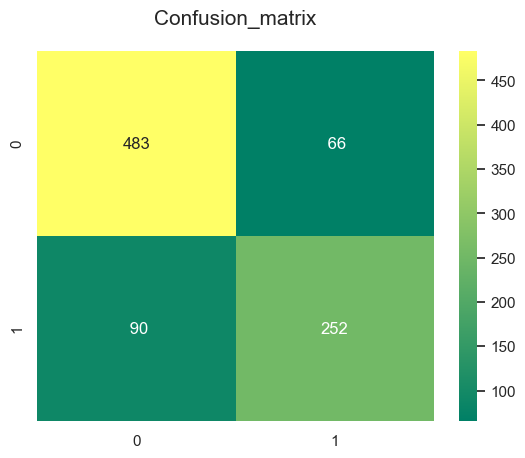

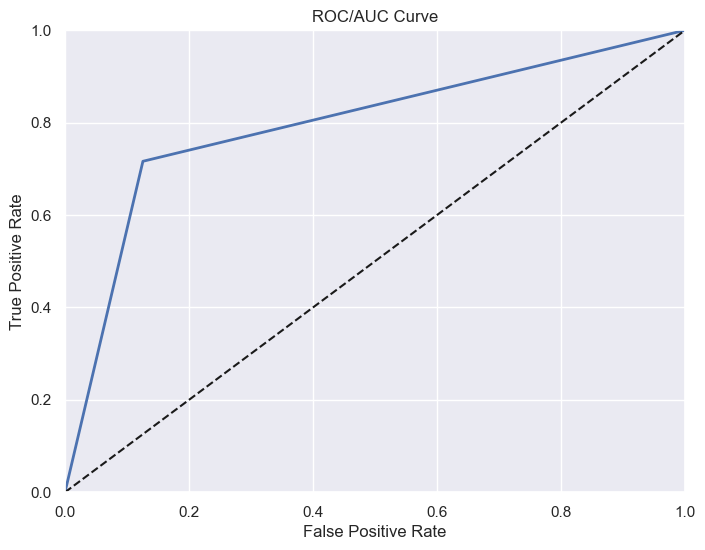

AUC Score: 0.7953456044482792


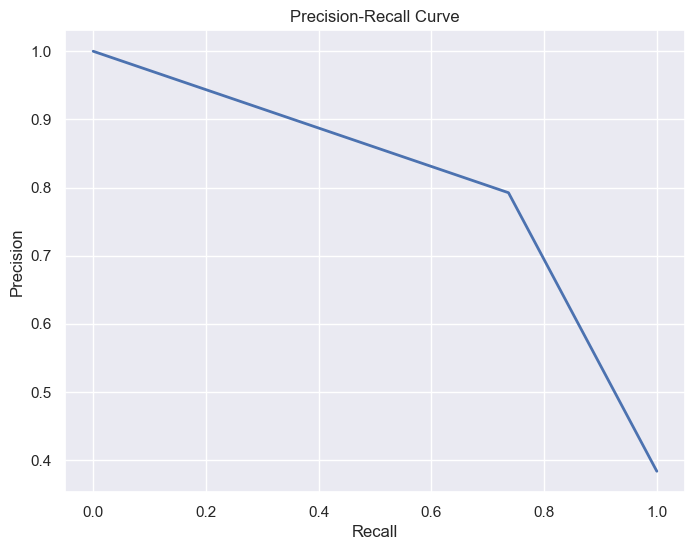

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       549
           1       0.79      0.74      0.76       342

    accuracy                           0.82       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



In [67]:
# Confusion_matrix

sns.heatmap(confusion_matrix(Targeted_feature,y_predmlp),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

# ROC/AUC Curve Matrix
roc_auc(mlp2,all_features,Targeted_feature)
    


# precision_recall_curve
prc(Targeted_feature,y_predmlp)

print(classification_report(Targeted_feature, y_predmlp))

# Recall = TP/TP+FN
# precision = TP /TP +FP
# Accuracy = TP+TN / Total

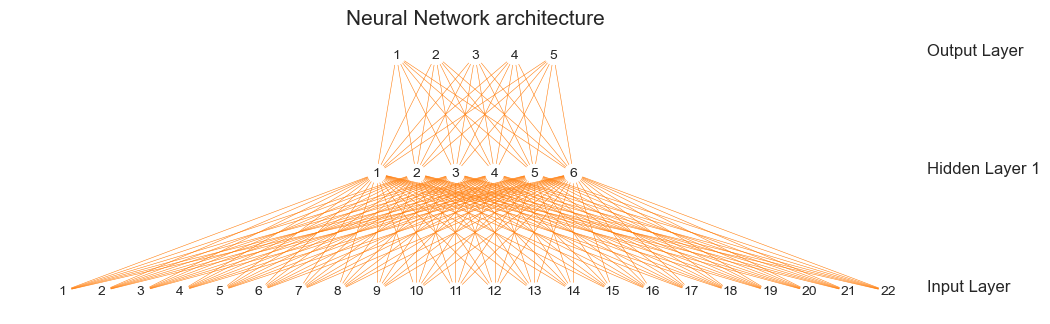

In [68]:
from VN import VisualizeNN as VisNN
network_structure=np.hstack(([X_train.shape[1]],
np.asarray(mlp.hidden_layer_sizes),))
network=VisNN.DrawNN(network_structure)
network.draw()